In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms


In [2]:
X_train = datasets.FashionMNIST(root='data', train=True, download=False, transform=transforms.ToTensor())
X_test = datasets.FashionMNIST(root='data', train=False, download=False, transform=transforms.ToTensor())	
train_loader = DataLoader(X_train, batch_size=64, shuffle=True)
test_loader = DataLoader(X_test, batch_size=64, shuffle=True)

In [9]:
class FashionANN(nn.Module):
    def __init__(self):
        super(FashionANN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, 0.2)
        x = F.relu(self.fc3(x))
        x = F.dropout(x, 0.2)
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

In [10]:
model = FashionANN()
criterian = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.003)

In [12]:
import time

epoch = 10

start_time = time.time()

for i in range(epoch):
    for img, label in train_loader:
        img = img.view(img.size(0), -1)  # Flatten the images
        output = model(img)
        loss = criterian(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: {}, Loss: {}".format(i, loss.item()))

print("Training completed in {} seconds".format(time.time() - start_time))

Epoch: 0, Loss: 0.5035350322723389
Epoch: 1, Loss: 0.85235995054245
Epoch: 2, Loss: 0.4142666459083557
Epoch: 3, Loss: 0.4039883315563202
Epoch: 4, Loss: 0.4842127859592438
Epoch: 5, Loss: 0.27784010767936707
Epoch: 6, Loss: 0.26880279183387756
Epoch: 7, Loss: 0.23285338282585144
Epoch: 8, Loss: 0.2307197004556656
Epoch: 9, Loss: 0.26129642128944397
Training completed in 88.9041736125946 seconds


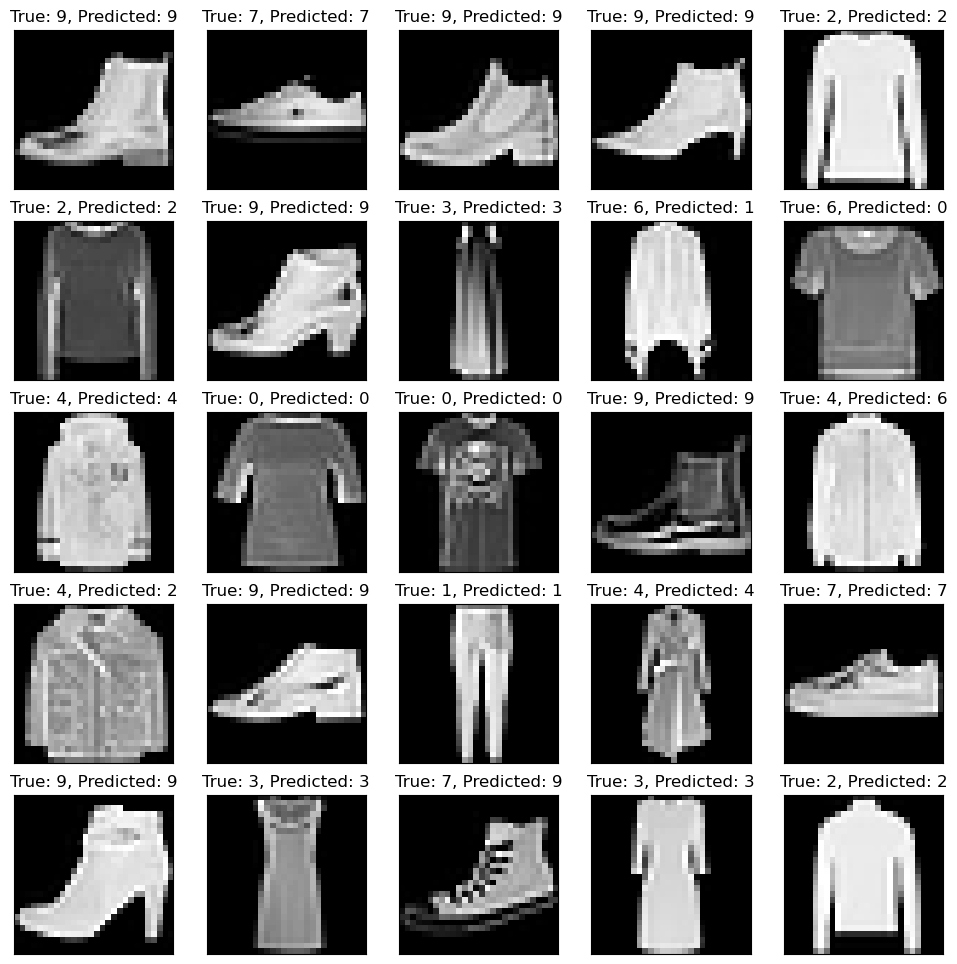

In [15]:
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.view(images.size(0), -1)

with torch.no_grad():
	output = model(images)
	predicted = torch.max(output, 1)[1]
	labels = labels.numpy()
	predicted = predicted.numpy()

fig = plt.figure(figsize=(12, 12))
for i in range(25):
	ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
	ax.imshow(images[i].numpy().reshape(28, 28), cmap='gray')
	ax.set_title("True: {}, Predicted: {}".format(labels[i], predicted[i]))

In [18]:
print(f"Accuracy: {(sum(predicted == labels) / len(labels))}")

Accuracy: 0.890625
